In [237]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score, auc
from pandas_profiling import profile_report
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

In [76]:
df = pd.read_csv("AREMdata.csv")

In [77]:
df

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0           0      32.25       5.76      14.00       4.36      18.00   
1         250      37.75       5.07      15.50       3.20      14.75   
2         500      34.50       2.60      20.00       4.74      20.50   
3         750      23.75       5.36      11.75       6.22      14.25   
4        1000      41.25       3.77      15.00       6.63      11.50   
...       ...        ...        ...        ...        ...        ...   
41274  118750      38.00       2.55      18.25       2.17      20.00   
41275  119000      36.00       0.00      19.00       1.41      13.67   
41276  119250      37.00       1.73      17.75       0.43      22.50   
41277  119500      37.00       3.74      19.00       4.18      22.00   
41278  119750      38.75       1.92      16.75       3.49      21.00   

       var_rss23    label  
0           2.12  walking  
1           1.79  walking  
2           2.87  walking  
3           3.77  walking  
4           2.69  walking  
...          ...      ...  
41274       4.74  cycling  
41275       1.25  cycling  
41276       0.87  cycling  
41277       1.41  cycling  
41278       3.67  cycling  

[41279 rows x 8 columns]

# Shuffling the dataset

In [78]:
df = df.sample(frac = 1)

In [79]:
df

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
2826   106500      26.50       2.29      15.50       3.91      17.50   
23816   74250      39.50       0.50       6.33       0.47      11.67   
31378   44750      42.25       0.43      20.67       0.47      35.00   
39332  113250      36.25       2.05      14.25       6.18      21.75   
37039   20000      37.33       1.25      14.33       0.47      14.00   
...       ...        ...        ...        ...        ...        ...   
5083    70750      40.40       6.02      19.40       1.36      14.75   
6596    89000      30.00       2.12      17.50       4.61      20.00   
39364    1250      36.00       2.12      15.25       3.11      20.75   
33546  106750      45.25       0.43      22.50       1.12      32.50   
26141   55500      42.25       0.43       7.25       0.43      12.00   

       var_rss23     label  
2826        2.60   walking  
23816       0.47     lying  
31378       1.41  bending1  
39332       1.30   cycling  
37039       3.16   cycling  
...          ...       ...  
5083        1.92   walking  
6596        3.54   walking  
39364       2.05   cycling  
33546       0.50  bending2  
26141       0.00     lying  

[41279 rows x 8 columns]

In [80]:
df.describe()

time     avg_rss12     var_rss12     avg_rss13     var_rss13  \
count   41279.000000  41279.000000  41279.000000  41279.000000  41279.000000   
mean    59876.123453     37.325185      2.120150     14.329701      1.918960   
std     34641.028148      6.339245      2.451187      5.347254      1.785972   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%     30000.000000     33.000000      0.430000     11.670000      0.470000   
50%     60000.000000     38.000000      0.940000     15.000000      1.410000   
75%     89875.000000     42.000000      3.420000     18.000000      3.030000   
max    119750.000000     56.250000     17.240000     35.000000     11.420000   

          avg_rss23     var_rss23  
count  41279.000000  41279.000000  
mean      16.402718      2.008475  
std        6.637769      1.815731  
min        0.000000      0.000000  
25%       12.670000      0.500000  
50%       16.500000      1.300000  
75%       19.500000      3.080000  
max       40.330000     13.610000

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41279 entries, 2826 to 26141
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       41279 non-null  int64  
 1   avg_rss12  41279 non-null  float64
 2   var_rss12  41279 non-null  float64
 3   avg_rss13  41279 non-null  float64
 4   var_rss13  41279 non-null  float64
 5   avg_rss23  41279 non-null  float64
 6   var_rss23  41279 non-null  float64
 7   label      41279 non-null  object 
dtypes: float64(6), int64(1), object(1)
memory usage: 2.8+ MB


# Data has no missing values.
# One column is of object type so apply label encoding. 

In [82]:
df["label"].value_counts()

lying       7200
walking     7200
standing    7200
sitting     7199
cycling     6240
bending1    3360
bending2    2880
Name: label, dtype: int64

In [83]:
df.profile_report()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# var_rss13 and var_rss23 has so many zeros

In [84]:
df['avg_rss12'] = df['avg_rss12'].replace(0,df['avg_rss12'].median())
df['var_rss12'] = df['var_rss12'].replace(0,df['var_rss12'].median())
df['avg_rss13'] = df['avg_rss13'].replace(0,df['avg_rss13'].median())
df['var_rss13'] = df['var_rss13'].replace(0,df['var_rss13'].median())
df['avg_rss23'] = df['avg_rss23'].replace(0,df['avg_rss23'].median())
df['var_rss23'] = df['var_rss23'].replace(0,df['var_rss23'].median())

In [85]:
df.isnull().sum() #no null values in data

time         0
avg_rss12    0
var_rss12    0
avg_rss13    0
var_rss13    0
avg_rss23    0
var_rss23    0
label        0
dtype: int64

# Checking for multicollinearty

In [31]:
vif_df = pd.DataFrame()

In [32]:
vif_df["vif"] = [variance_inflation_factor(arr, i) for i in range(arr.shape[1])]
vif["features"] = df.columns

NameError: name 'arr' is not defined

In [86]:
labelencoder = LabelEncoder()

In [87]:
df["label_code"] = labelencoder.fit_transform(df["label"])

In [88]:
df

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
2826   106500      26.50       2.29      15.50       3.91      17.50   
23816   74250      39.50       0.50       6.33       0.47      11.67   
31378   44750      42.25       0.43      20.67       0.47      35.00   
39332  113250      36.25       2.05      14.25       6.18      21.75   
37039   20000      37.33       1.25      14.33       0.47      14.00   
...       ...        ...        ...        ...        ...        ...   
5083    70750      40.40       6.02      19.40       1.36      14.75   
6596    89000      30.00       2.12      17.50       4.61      20.00   
39364    1250      36.00       2.12      15.25       3.11      20.75   
33546  106750      45.25       0.43      22.50       1.12      32.50   
26141   55500      42.25       0.43       7.25       0.43      12.00   

       var_rss23     label  label_code  
2826        2.60   walking           6  
23816       0.47     lying           3  
31378       1.41  bending1           0  
39332       1.30   cycling           2  
37039       3.16   cycling           2  
...          ...       ...         ...  
5083        1.92   walking           6  
6596        3.54   walking           6  
39364       2.05   cycling           2  
33546       0.50  bending2           1  
26141       1.30     lying           3  

[41279 rows x 9 columns]

In [157]:
df1 = df.copy()

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_rss12'>

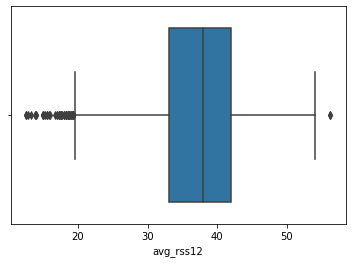

In [158]:
sns.boxplot(df1["avg_rss12"])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='var_rss12'>

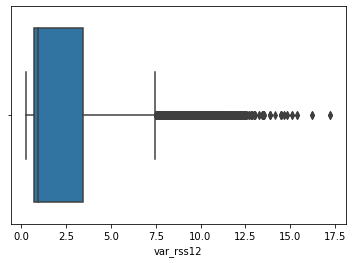

In [159]:
sns.boxplot(df1["var_rss12"])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_rss13'>

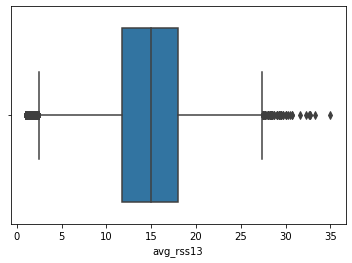

In [160]:
sns.boxplot(df1["avg_rss13"])

In [161]:
Q1 = df1["avg_rss12"].quantile(0.25)
Q3 =df1["avg_rss12"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3-1.5*IQR
lower_limit = Q1-1.5*IQR

In [162]:
df1 = df1[df1["avg_rss12"]>lower_limit]

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='avg_rss12'>

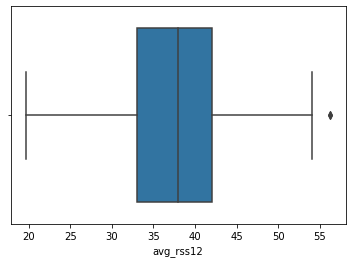

In [163]:
sns.boxplot(df1["avg_rss12"])

In [164]:
df1

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
2826   106500      26.50       2.29      15.50       3.91      17.50   
23816   74250      39.50       0.50       6.33       0.47      11.67   
31378   44750      42.25       0.43      20.67       0.47      35.00   
39332  113250      36.25       2.05      14.25       6.18      21.75   
37039   20000      37.33       1.25      14.33       0.47      14.00   
...       ...        ...        ...        ...        ...        ...   
5083    70750      40.40       6.02      19.40       1.36      14.75   
6596    89000      30.00       2.12      17.50       4.61      20.00   
39364    1250      36.00       2.12      15.25       3.11      20.75   
33546  106750      45.25       0.43      22.50       1.12      32.50   
26141   55500      42.25       0.43       7.25       0.43      12.00   

       var_rss23     label  label_code  
2826        2.60   walking           6  
23816       0.47     lying           3  
31378       1.41  bending1           0  
39332       1.30   cycling           2  
37039       3.16   cycling           2  
...          ...       ...         ...  
5083        1.92   walking           6  
6596        3.54   walking           6  
39364       2.05   cycling           2  
33546       0.50  bending2           1  
26141       1.30     lying           3  

[41206 rows x 9 columns]

In [165]:
Q1 = df1["var_rss12"].quantile(0.25)
Q3 =df1["var_rss12"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

In [166]:
df1 = df1[df1["var_rss12"]<upper_limit]

In [167]:
df1

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
2826   106500      26.50       2.29      15.50       3.91      17.50   
23816   74250      39.50       0.50       6.33       0.47      11.67   
31378   44750      42.25       0.43      20.67       0.47      35.00   
39332  113250      36.25       2.05      14.25       6.18      21.75   
37039   20000      37.33       1.25      14.33       0.47      14.00   
...       ...        ...        ...        ...        ...        ...   
5083    70750      40.40       6.02      19.40       1.36      14.75   
6596    89000      30.00       2.12      17.50       4.61      20.00   
39364    1250      36.00       2.12      15.25       3.11      20.75   
33546  106750      45.25       0.43      22.50       1.12      32.50   
26141   55500      42.25       0.43       7.25       0.43      12.00   

       var_rss23     label  label_code  
2826        2.60   walking           6  
23816       0.47     lying           3  
31378       1.41  bending1           0  
39332       1.30   cycling           2  
37039       3.16   cycling           2  
...          ...       ...         ...  
5083        1.92   walking           6  
6596        3.54   walking           6  
39364       2.05   cycling           2  
33546       0.50  bending2           1  
26141       1.30     lying           3  

[39464 rows x 9 columns]

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='var_rss12'>

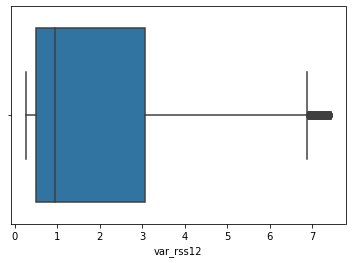

In [168]:
sns.boxplot(df1["var_rss12"])

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='var_rss12', ylabel='Density'>

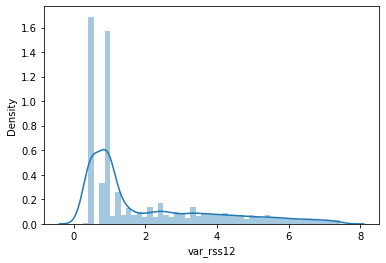

In [169]:
sns.distplot(df1["var_rss12"])

In [170]:
Q1 = df1["var_rss13"].quantile(0.25)
Q3 =df1["var_rss13"].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR

In [171]:
df1 = df1[df1["var_rss13"]>lower_limit]

In [172]:
df1 = df1[df1["var_rss13"]<upper_limit]

In [173]:
df1

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
2826   106500      26.50       2.29      15.50       3.91      17.50   
23816   74250      39.50       0.50       6.33       0.47      11.67   
31378   44750      42.25       0.43      20.67       0.47      35.00   
37039   20000      37.33       1.25      14.33       0.47      14.00   
35298   64750      33.00       2.12      18.25       0.43      19.00   
...       ...        ...        ...        ...        ...        ...   
5083    70750      40.40       6.02      19.40       1.36      14.75   
6596    89000      30.00       2.12      17.50       4.61      20.00   
39364    1250      36.00       2.12      15.25       3.11      20.75   
33546  106750      45.25       0.43      22.50       1.12      32.50   
26141   55500      42.25       0.43       7.25       0.43      12.00   

       var_rss23     label  label_code  
2826        2.60   walking           6  
23816       0.47     lying           3  
31378       1.41  bending1           0  
37039       3.16   cycling           2  
35298       2.12   cycling           2  
...          ...       ...         ...  
5083        1.92   walking           6  
6596        3.54   walking           6  
39364       2.05   cycling           2  
33546       0.50  bending2           1  
26141       1.30     lying           3  

[38425 rows x 9 columns]

# In the process of removing outliers, we are losing so much of data.

In [174]:
df2 = df.drop("label", axis =1)

In [175]:
df2

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
2826   106500      26.50       2.29      15.50       3.91      17.50   
23816   74250      39.50       0.50       6.33       0.47      11.67   
31378   44750      42.25       0.43      20.67       0.47      35.00   
39332  113250      36.25       2.05      14.25       6.18      21.75   
37039   20000      37.33       1.25      14.33       0.47      14.00   
...       ...        ...        ...        ...        ...        ...   
5083    70750      40.40       6.02      19.40       1.36      14.75   
6596    89000      30.00       2.12      17.50       4.61      20.00   
39364    1250      36.00       2.12      15.25       3.11      20.75   
33546  106750      45.25       0.43      22.50       1.12      32.50   
26141   55500      42.25       0.43       7.25       0.43      12.00   

       var_rss23  label_code  
2826        2.60           6  
23816       0.47           3  
31378       1.41           0  
39332       1.30           2  
37039       3.16           2  
...          ...         ...  
5083        1.92           6  
6596        3.54           6  
39364       2.05           2  
33546       0.50           1  
26141       1.30           3  

[41279 rows x 8 columns]

In [201]:
y = df2["label_code"]

In [183]:
X = df2.drop("label_code", axis = 1)

In [184]:
X

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
2826   106500      26.50       2.29      15.50       3.91      17.50   
23816   74250      39.50       0.50       6.33       0.47      11.67   
31378   44750      42.25       0.43      20.67       0.47      35.00   
39332  113250      36.25       2.05      14.25       6.18      21.75   
37039   20000      37.33       1.25      14.33       0.47      14.00   
...       ...        ...        ...        ...        ...        ...   
5083    70750      40.40       6.02      19.40       1.36      14.75   
6596    89000      30.00       2.12      17.50       4.61      20.00   
39364    1250      36.00       2.12      15.25       3.11      20.75   
33546  106750      45.25       0.43      22.50       1.12      32.50   
26141   55500      42.25       0.43       7.25       0.43      12.00   

       var_rss23  
2826        2.60  
23816       0.47  
31378       1.41  
39332       1.30  
37039       3.16  
...          ...  
5083        1.92  
6596        3.54  
39364       2.05  
33546       0.50  
26141       1.30  

[41279 rows x 7 columns]

In [190]:
X.columns

Index(['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23'],
      dtype='object')

In [185]:
scaler = StandardScaler()

In [186]:
scaled_x = scaler.fit_transform(X)

In [191]:
df3 = pd.DataFrame(data = scaled_x, columns = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23'] )

In [192]:
df3

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0      1.345931  -1.709393  -0.006650   0.202371   1.096911   0.153132   
1      0.414943   0.343073  -0.779634  -1.564358  -1.030171  -0.741997   
2     -0.436659   0.777249  -0.809862   1.198444  -1.030171   2.840054   
3      1.540789  -0.170043  -0.110290  -0.038459   2.500538   0.805670   
4     -1.151138   0.000469  -0.455758  -0.023046  -1.030171  -0.384253   
...         ...        ...        ...        ...        ...        ...   
41274  0.313905   0.485167   1.604093   0.953761  -0.479850  -0.269099   
41275  0.840744  -1.156806  -0.080062   0.587699   1.529747   0.536978   
41276 -1.692410  -0.209514  -0.080062   0.154205   0.602241   0.652132   
41277  1.353148   1.250895  -0.809862   1.551019  -0.628251   2.456208   
41278 -0.126329   0.777249  -0.809862  -1.387107  -1.054904  -0.691329   

       var_rss23  
0       0.268395  
1      -0.978630  
2      -0.428300  
3      -0.492700  
4       0.596251  
...          ...  
41274  -0.129716  
41275   0.818725  
41276  -0.053607  
41277  -0.961066  
41278  -0.492700  

[41279 rows x 7 columns]

In [193]:
vif_df = pd.DataFrame()

In [196]:
vif_df["vif"] = [variance_inflation_factor(scaled_x, i) for i in range(scaled_x.shape[1])]
vif_df["features"] = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23']

In [198]:
vif_df

vif   features
0  1.000288       time
1  1.152154  avg_rss12
2  1.519308  var_rss12
3  1.395743  avg_rss13
4  1.382276  var_rss13
5  1.357357  avg_rss23
6  1.520190  var_rss23

# As VIF is not even grreater than 5 so no multicollibearty does not exist.

# Building model

In [203]:
train_x, test_x, train_y, test_y = train_test_split(scaled_x, y, test_size = 0.2, random_state = 42)


In [204]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)


(33023, 7)
(8256, 7)
(33023,)
(8256,)


In [282]:
model = LogisticRegression(multi_class = 'multinomial', penalty = 'l2', solver = 'lbfgs', verbose = 1)

In [283]:
model

LogisticRegression(multi_class='multinomial', verbose=1)

In [284]:
model.fit(train_x, train_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.2s finished


LogisticRegression(multi_class='multinomial', verbose=1)

In [285]:
y_pred = model.predict(test_x)

In [286]:
y_pred

array([3, 3, 1, ..., 6, 0, 2])

In [287]:
confusion_matrix(test_y, y_pred)

array([[ 552,    1,    9,    0,  131,    0,    0],
       [  34,  390,   24,   58,   47,    4,   11],
       [   4,   21,  717,    3,  118,  233,  172],
       [   0,   46,    3, 1170,  178,    1,    3],
       [  34,   90,   29,  223, 1043,    0,    8],
       [   0,   25,  366,    4,   21,  562,  468],
       [   0,   20,  364,    2,   24,  612,  431]], dtype=int64)

In [288]:
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       693
           1       0.66      0.69      0.67       568
           2       0.47      0.57      0.52      1268
           3       0.80      0.84      0.82      1401
           4       0.67      0.73      0.70      1427
           5       0.40      0.39      0.39      1446
           6       0.39      0.30      0.34      1453

    accuracy                           0.59      8256
   macro avg       0.61      0.61      0.61      8256
weighted avg       0.58      0.59      0.58      8256



In [289]:
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y.shape[1]
n_classes

7

In [290]:
y_score = model.fit(train_x, train_y).decision_function(test_x)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s finished


In [231]:
y_score

array([[ -7.92563438,  -1.65220767,  -1.0576615 , ...,   4.26597344,
         -0.27364238,  -0.18917695],
       [ -4.32239609,  -1.00301892,  -0.68476187, ...,   3.96105131,
         -1.07346944,  -1.01826949],
       [  0.70007765,   3.23008186,  -1.09099374, ...,   1.53038499,
         -1.89394548,  -1.91215304],
       ...,
       [-11.80567626,  -0.37597551,   5.90015735, ...,  -5.12847275,
          7.9656175 ,   7.97019003],
       [  6.15738371,   0.53238897,   0.46198615, ...,   1.98326034,
         -2.74043236,  -2.76655674],
       [ -2.52131132,  -1.7946686 ,   3.39570463, ...,  -0.73735177,
          2.62676436,   2.61910705]])

In [239]:
y_prob = model.predict_proba(test_x)

In [240]:
y_prob

array([[3.61097378e-07, 1.91486844e-04, 3.47014052e-04, ...,
        7.11823529e-02, 7.60050127e-04, 8.27037317e-04],
       [1.13443931e-04, 3.13594512e-03, 4.31107658e-03, ...,
        4.48990100e-01, 2.92261885e-03, 3.08848301e-03],
       [6.08083565e-02, 7.63361294e-01, 1.01417020e-02, ...,
        1.39495809e-01, 4.54352933e-03, 4.46155133e-03],
       ...,
       [1.21543887e-09, 1.11837922e-04, 5.94674009e-02, ...,
        9.65174328e-07, 4.69133995e-01, 4.71284036e-01],
       [9.77820322e-01, 3.52658926e-03, 3.28684576e-03, ...,
        1.50473600e-02, 1.33655439e-04, 1.30208988e-04],
       [1.38206523e-03, 2.85828456e-03, 5.13163690e-01, ...,
        8.22796301e-03, 2.37853422e-01, 2.36039059e-01]])

# model using solver newton-cg

In [244]:
model1 = LogisticRegression(solver = 'newton-cg', penalty = 'l2', C = 1, multi_class = 'multinomial')

In [245]:
model1.fit(train_x, train_y)

LogisticRegression(C=1, multi_class='multinomial', solver='newton-cg')

In [246]:
y_pred1 = model1.predict(test_x)

In [247]:
confusion_matrix(test_y, y_pred1)

array([[ 552,    1,    9,    0,  131,    0,    0],
       [  34,  390,   24,   58,   47,    4,   11],
       [   4,   20,  717,    3,  118,  234,  172],
       [   0,   46,    3, 1170,  178,    1,    3],
       [  34,   90,   29,  223, 1043,    0,    8],
       [   0,   25,  366,    4,   21,  562,  468],
       [   0,   20,  364,    2,   24,  612,  431]], dtype=int64)

In [248]:
print(classification_report(test_y, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       693
           1       0.66      0.69      0.67       568
           2       0.47      0.57      0.52      1268
           3       0.80      0.84      0.82      1401
           4       0.67      0.73      0.70      1427
           5       0.40      0.39      0.39      1446
           6       0.39      0.30      0.34      1453

    accuracy                           0.59      8256
   macro avg       0.61      0.61      0.61      8256
weighted avg       0.58      0.59      0.58      8256



# model using solver == sag

In [255]:
model2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial')

In [256]:
model2.fit(train_x, train_y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [265]:
y_pred2 = model2.predict(test_x)

In [266]:
confusion_matrix(test_y, y_pred2)

array([[ 552,    1,    9,    0,  131,    0,    0],
       [  34,  390,   24,   58,   47,    4,   11],
       [   4,   20,  717,    3,  118,  230,  176],
       [   0,   46,    3, 1170,  178,    1,    3],
       [  34,   90,   29,  223, 1043,    0,    8],
       [   0,   25,  366,    4,   21,  560,  470],
       [   0,   20,  364,    2,   24,  613,  430]], dtype=int64)

In [267]:
print(classification_report(test_y, y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       693
           1       0.66      0.69      0.67       568
           2       0.47      0.57      0.52      1268
           3       0.80      0.84      0.82      1401
           4       0.67      0.73      0.70      1427
           5       0.40      0.39      0.39      1446
           6       0.39      0.30      0.34      1453

    accuracy                           0.59      8256
   macro avg       0.61      0.61      0.61      8256
weighted avg       0.58      0.59      0.58      8256



# model using solver saga

In [268]:
model3 = LogisticRegression(solver = 'saga', multi_class = 'multinomial')

In [270]:
model3.fit(train_x, train_y)

LogisticRegression(multi_class='multinomial', solver='saga')

In [271]:
y_pred3 = model3.predict(test_x)

In [272]:
confusion_matrix(test_y, y_pred3 )

array([[ 552,    1,    9,    0,  131,    0,    0],
       [  34,  390,   24,   58,   47,    4,   11],
       [   4,   20,  717,    3,  118,  234,  172],
       [   0,   46,    3, 1170,  178,    1,    3],
       [  34,   90,   29,  223, 1043,    0,    8],
       [   0,   25,  366,    4,   21,  562,  468],
       [   0,   20,  364,    2,   24,  612,  431]], dtype=int64)

In [291]:
print(classification_report(test_y, y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       693
           1       0.66      0.69      0.67       568
           2       0.47      0.57      0.52      1268
           3       0.80      0.84      0.82      1401
           4       0.67      0.73      0.70      1427
           5       0.40      0.39      0.39      1446
           6       0.39      0.30      0.34      1453

    accuracy                           0.59      8256
   macro avg       0.61      0.61      0.61      8256
weighted avg       0.58      0.59      0.58      8256



# Multiclass = ovr(one v/s rest or one v/s all)

In [293]:
model11 = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs', penalty = 'l2', C = 1.0)

In [294]:
model11

LogisticRegression(multi_class='ovr')

In [295]:
model11.fit(train_x, train_y)

LogisticRegression(multi_class='ovr')

In [296]:
y_pred11 = model.predict(test_x)

In [297]:
y_pred11

array([3, 3, 1, ..., 6, 0, 2])

In [298]:
confusion_matrix(test_y, y_pred11)

array([[ 552,    1,    9,    0,  131,    0,    0],
       [  34,  390,   24,   58,   47,    4,   11],
       [   4,   21,  717,    3,  118,  233,  172],
       [   0,   46,    3, 1170,  178,    1,    3],
       [  34,   90,   29,  223, 1043,    0,    8],
       [   0,   25,  366,    4,   21,  562,  468],
       [   0,   20,  364,    2,   24,  612,  431]], dtype=int64)

In [300]:
print(classification_report(test_y, y_pred11))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       693
           1       0.66      0.69      0.67       568
           2       0.47      0.57      0.52      1268
           3       0.80      0.84      0.82      1401
           4       0.67      0.73      0.70      1427
           5       0.40      0.39      0.39      1446
           6       0.39      0.30      0.34      1453

    accuracy                           0.59      8256
   macro avg       0.61      0.61      0.61      8256
weighted avg       0.58      0.59      0.58      8256

